**Importing Useful Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Url**

In [ ]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"

**Reading the Data from the Url**

In [ ]:
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [ ]:
df.shape

(1067, 13)

**Descriptive Statistics**

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


**Preparing And Understanding The Data --Correlation**

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
df2 = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]

In [ ]:
df2.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [ ]:
df2.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


**Data Plots**

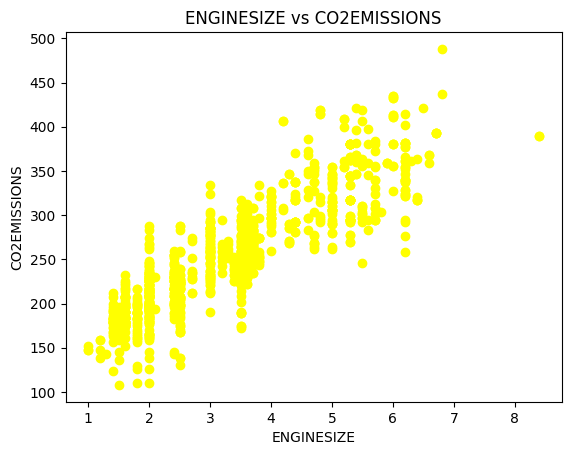

In [ ]:
plt.scatter(df2['ENGINESIZE'], df2['CO2EMISSIONS'], color='yellow')
plt.title('ENGINESIZE vs CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

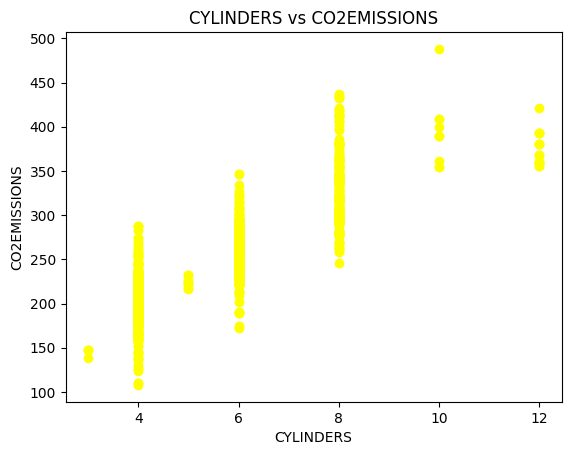

In [ ]:
plt.scatter(df2['CYLINDERS'], df2['CO2EMISSIONS'], color='yellow')
plt.title('CYLINDERS vs CO2EMISSIONS')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

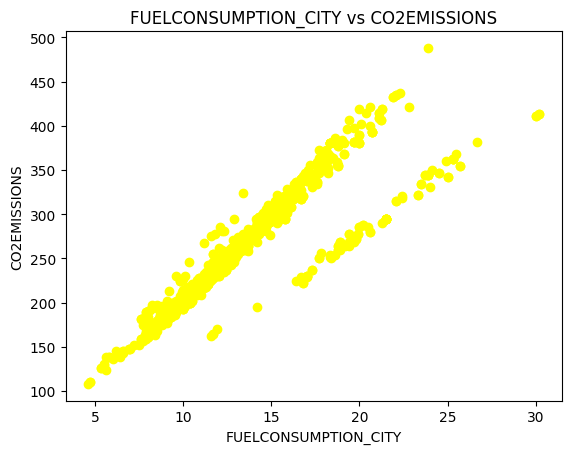

In [ ]:
plt.scatter(df2['FUELCONSUMPTION_CITY'], df2['CO2EMISSIONS'], color='yellow')
plt.title('FUELCONSUMPTION_CITY vs CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

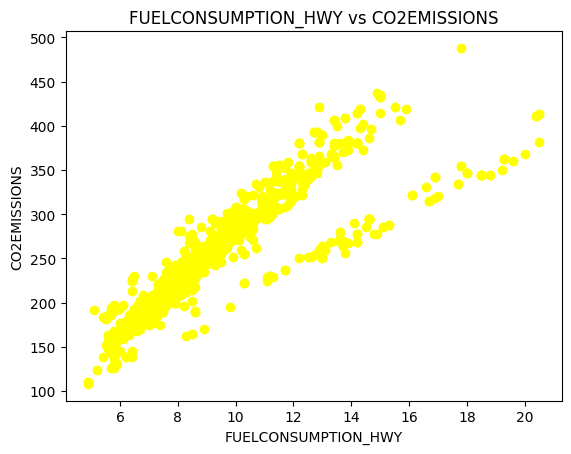

In [ ]:
plt.scatter(df2['FUELCONSUMPTION_HWY'], df2['CO2EMISSIONS'], color='yellow')
plt.title('FUELCONSUMPTION_HWY vs CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.show()

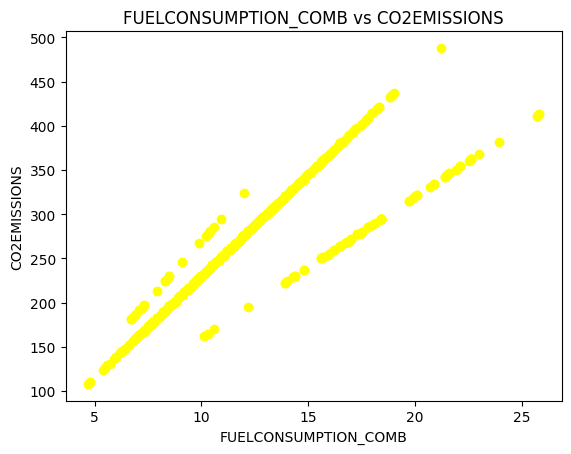

In [ ]:
plt.scatter(df2['FUELCONSUMPTION_COMB'], df2['CO2EMISSIONS'], color='yellow')
plt.title('FUELCONSUMPTION_COMB vs CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

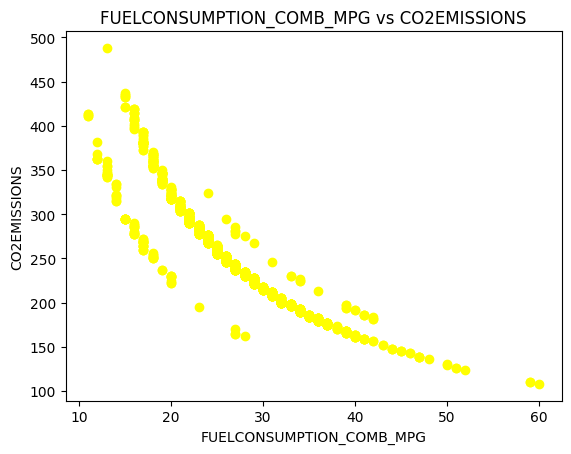

In [ ]:
plt.scatter(df2['FUELCONSUMPTION_COMB_MPG'], df2['CO2EMISSIONS'], color='yellow')
plt.title('FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

**Creating Machine To train and Test the Dataset**

In [32]:
msk =np.random.rand(len(df2))<0.8
train =df2[msk]
test =df2[~msk]

**MODELLING Y= A+Bx**

In [33]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.56824536]]
Intercept:  [124.60350944]


**The Linear Model**

**CO2Emission= 124.6 + 39.57*EngineSize**


Text(0, 0.5, 'CO2Emission')

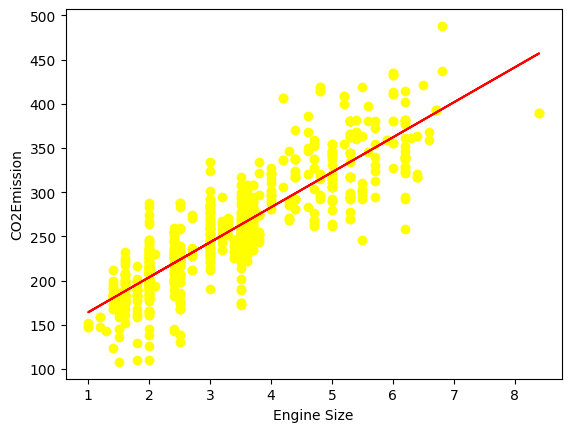

In [34]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='yellow')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2Emission')

**Evaluating**

In [35]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.21
Residual sum of squares (MSE): 867.72
R2-score: 0.74


The model accuracy is 74%, implying that simple linear regression model may not be the best model in prediction of CO2Emission. We have to explore the multiple linear regression too, make a comaparison and choose the best model.